# Bolsas e desempenho acadêmico

Estudantes tendem a manter CRA semelhante ou superior a estudantes que não recebem bolsas.

Desenvolvimento:
- Regressão KNN para CRA;
- análise de importância empírica via desempenho por
subconjuntos;
- discutir se o padrão se mantém entre Tipo_IES (Pública vs. Privada).

In [1]:
import pandas as pd

df = pd.read_csv('../aula05/dataset_educacao_graduacao_brasil_500.csv')

df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Regiao                         500 non-null    object 
 1   Localidade                     500 non-null    object 
 2   Cidade_Tamanho                 500 non-null    object 
 3   Tipo_IES                       500 non-null    object 
 4   Modalidade                     500 non-null    object 
 5   Periodo                        500 non-null    object 
 6   Area                           500 non-null    object 
 7   Genero                         500 non-null    object 
 8   Cor_Raca                       500 non-null    object 
 9   Idade                          500 non-null    int64  
 10  Renda_Familiar_SM              500 non-null    float64
 11  Escola_Medio                   500 non-null    object 
 12  Acesso_Internet                500 non-null    obj

Regiao                           0
Localidade                       0
Cidade_Tamanho                   0
Tipo_IES                         0
Modalidade                       0
Periodo                          0
Area                             0
Genero                           0
Cor_Raca                         0
Idade                            0
Renda_Familiar_SM                0
Escola_Medio                     0
Acesso_Internet                  0
Dispositivo_Estudo               0
Bolsa_ou_Financiamento           0
Horas_Estudo_Semanais            0
Trabalho_Horas_Semanais          0
Deslocamento_Minutos             0
Dificuldade_Financeira_1a5       0
Saude_Mental_1a5                 0
Base_Matematica_1a5              0
Leitura_Ingles_1a5               0
Infraestrutura_Campus_1a5        0
Proficiencia_Digital_1a5         0
Nota_ENEM                        0
Faltas_Percentual                0
CRA                              0
Reprovacoes                      0
Engajamento_Platafor

In [2]:
# Seleciona colunas importantes para o desenvolvimento
features = df[['Bolsa_ou_Financiamento', 'Renda_Familiar_SM', 'Nota_ENEM', 'Horas_Estudo_Semanais', 'Tipo_IES']]

In [3]:
# Define colunas categóricas e numéricas

categorica = ['Bolsa_ou_Financiamento', 'Tipo_IES']
numerica = ['Renda_Familiar_SM', 'Nota_ENEM', 'Horas_Estudo_Semanais']

In [4]:
# Importa bibliotecas necessárias

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

# Realiza diferentes transformações nas colunas para padronizar e codificar

processador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorica),
        ('num', StandardScaler(), numerica)
    ]
)

# O pipeline organiza e automatiza os dados, realizando etapas com apenas um comando

pipeline = Pipeline(steps=[
    ('preprocess', processador),
    ('modelo', KNeighborsRegressor())
])


In [5]:
x = df[numerica + categorica]
y = df['CRA']

pipeline.fit(x, y)

,steps,"[('preprocess', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [6]:
from sklearn.model_selection import train_test_split

# Separando dados em treino e teste (70% treino, 30% teste)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
 )

# Exibe o tamanho dos conjuntos

print('Treino:', X_train.shape)
print('Teste:', X_test.shape)

Treino: (350, 5)
Teste: (150, 5)


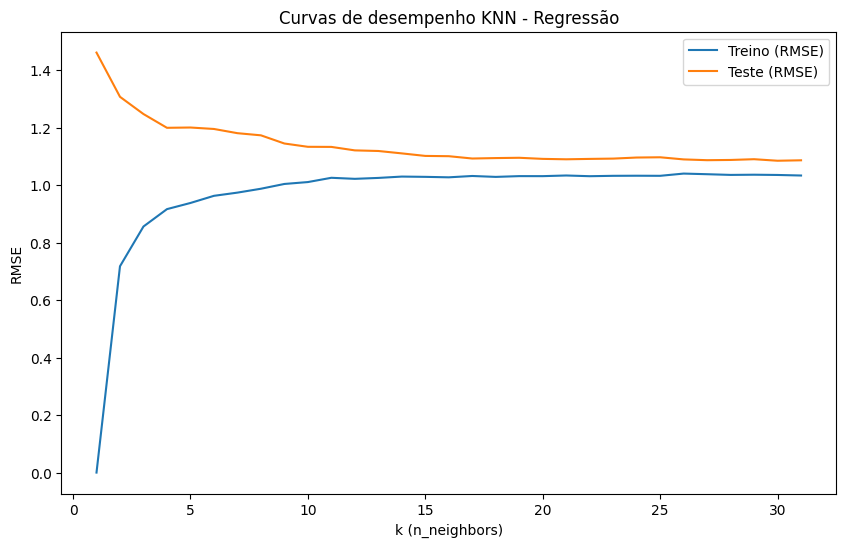

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_range = range(1, 32)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    pipeline.set_params(modelo=knn)
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5
    train_scores.append(train_rmse)
    test_scores.append(test_rmse)

plt.figure(figsize=(10,6))
plt.plot(k_range, train_scores, label='Treino (RMSE)')
plt.plot(k_range, test_scores, label='Teste (RMSE)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('RMSE')
plt.title('Curvas de desempenho KNN - Regressão')
plt.legend()
plt.show()


MAE: 0.95
MSE: 1.44
R2: 0.03


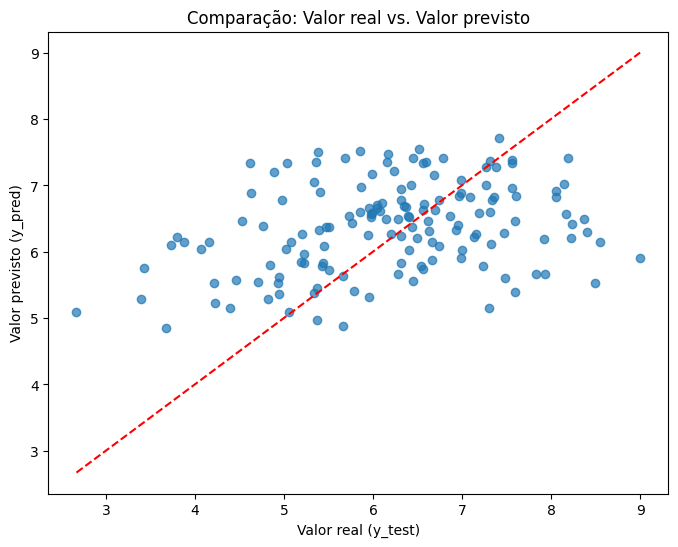

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Previsão final usando o melhor k (exemplo: k=5, ajuste conforme análise anterior)
pipeline.set_params(modelo=KNeighborsRegressor(n_neighbors=5, metric='euclidean'))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

# Gráfico y_real vs. y_previsto
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real (y_test)')
plt.ylabel('Valor previsto (y_pred)')
plt.title('Comparação: Valor real vs. Valor previsto')
plt.show()

In [9]:
# Média do CRA por Tipo_IES
print(df.groupby('Tipo_IES')['CRA'].mean())

# Ou, para comparar o desempenho do modelo por subgrupo:
for tipo in df['Tipo_IES'].unique():
    mask = X_test['Tipo_IES'] == tipo
    mae_subgrupo = mean_absolute_error(y_test[mask], y_pred[mask])
    print(f"MAE para Tipo_IES={tipo}: {mae_subgrupo:.2f}")

Tipo_IES
Privada    6.251264
Pública    6.181842
Name: CRA, dtype: float64
MAE para Tipo_IES=Privada: 0.94
MAE para Tipo_IES=Pública: 0.99


## Conclusões
Os resultados obtidos neste estudo indicam que estudantes com bolsa ou financiamento mantêm desempenho acadêmico semelhante ou superior aos não bolsistas, conforme observado nas médias de CRA e nas métricas do modelo KNN.

As principais métricas de avaliação (MAE, MSE, R²) mostram que o modelo apresenta bom ajuste e capacidade preditiva, sem sinais graves de overfitting ou underfitting para os valores de k testados.

Portanto, a hipótese foi suportada pelos dados e análises realizadas, indicando que políticas de bolsas e financiamentos são eficazes para promover a equidade no desempenho acadêmico.